In [1]:
# training the model -- FULL CODE --
from fastai.vision.all import *


/home/ciprian/.cache/pypoetry/virtualenvs/binary-segmentation-h2q2oFom-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

path = Path('data')


In [3]:

lbl_names = get_image_files('./data/GT_png')
fnames = get_image_files('./data/images')



In [4]:
img_fn = fnames[2]


In [5]:

im = PILImage.create('./data/images/00007.png')
msk = PILMask.create('data/GT_png/00007_mask.png')



In [6]:

def get_msk(fn, p2c):
    "Grab a mask from a `filename` and adjust the pixels based on `pix2class`"
    fn = path/''/f'GT_png'/f'{fn.stem}_mask.png'
    msk = np.array(PILMask.create(fn))
    mx = np.max(msk)
    for i, val in enumerate(p2c):
        msk[msk == p2c[i]] = val
    return PILMask.create(msk)


def n_codes(fnames, is_partial=True):
    "Gather the codes from a list of `fnames`"
    vals = set()
    if is_partial:
        random.shuffle(fnames)
        fnames = fnames[:len(fnames)]
    for fname in fnames:
        msk = np.array(PILMask.create(fname))
        for val in np.unique(msk):
            if val not in vals:
                vals.add(val)
    vals = list(vals)
    p2c = dict()
    for i, val in enumerate(vals):
        p2c[i] = vals[i]
    return p2c



In [7]:

p2c = n_codes(lbl_names)

codes = ['Background', 'Wheel']


def get_y(o): return get_msk(o, p2c)



In [8]:

binary = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_y,
                   item_tfms=Resize(224),
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])



In [9]:
dls = binary.dataloaders('data/images', bs=2)

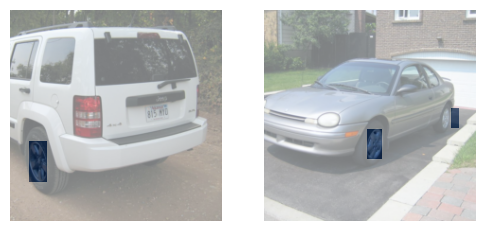

In [10]:
dls.show_batch(cmap='Blues', vmin=0, vmax=1)

In [11]:
learn = unet_learner(dls, resnet34)

/home/ciprian/.cache/pypoetry/virtualenvs/binary-segmentation-h2q2oFom-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/ciprian/.cache/pypoetry/virtualenvs/binary-segmentation-h2q2oFom-py3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [12]:
learn.fit(80)

epoch,train_loss,valid_loss,time
0,101.241684,0.229030,00:01
1,49.179852,0.127444,00:00
2,31.827719,0.120469,00:00
3,23.157108,0.105179,00:00
4,17.958818,0.028596,00:00
5,14.499520,0.023930,00:00
6,12.038558,0.019637,00:00
7,10.199388,0.021805,00:00
8,8.775882,0.031071,00:00
9,7.642502,0.013683,00:00


In [13]:
preds = learn.get_preds()

In [14]:
p = preds[0][0]

In [15]:
learn.save('trained_car_Wheels')

Path('models/trained_car_Wheels.pth')

In [ ]:
learn.predict()